# Network Notes

In [470]:
# good 160 unit *3 network
network_model = "conv-v7-1-1"
iter1 = 150
iter2 = 300
codec = 3200
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



saving config 
scanning testdata into frames and frame sequences 
actual number of frames: 4845288 
number of frame sequences: 24225 
loading model: out/conv-v7-1-1/model-152.h5 
saving config after loading model 
saving config 
generate_len: None 
Training Iteration 152 
Make all lstms trainable 
Compiling model 
using full set of frames 

 6360/24225 [======>.......................] - ETA: 430s - loss: 12.8877'


In [471]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


frame_seq_len :  200
generate_len :  200
gen_every_nth :  10
framelen :  13
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
model_filename :  out/conv-v7-1-1/model-152.h5
limit_frames :  0
seed_seq_len :  200
shuffle :  False
stateful :  False
fit_batch_size :  20
num_iterations :  1200
seq_step :  200
learn_next_step :  True
save_model_every_nth :  10
optimizer :  {'params': {}, 'name': 'Nadam'}
test_data_fn :  test/criticalpracticalreason.c2-3200
start_iteration :  152


In [472]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [473]:
nd.model_config(network_model)

reshape_1 : Reshape
trainable?  True
 units
 activation
 dropout
stateful 

conv2d_1 : Conv2D
trainable?  True
 units
relu activation
 dropout
stateful 

permute_1 : Permute
trainable?  True
 units
 activation
 dropout
stateful 

max_pooling2d_1 : MaxPooling2D
trainable?  True
 units
 activation
 dropout
stateful 

reshape_2 : Reshape
trainable?  True
 units
 activation
 dropout
stateful 

lstm_1 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_2 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

dense_1 : Dense
trainable?  True
13 units
relu activation
 dropout
stateful 



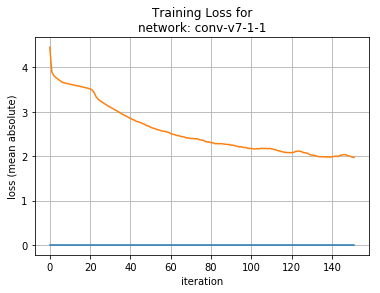

In [474]:
nd.plot_training_loss(network_model)

In [475]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

0,2.00199804238
0,1.99234858313
0,2.0152821975
0,2.02790434716
0,2.03433214276
0,2.02853287877
0,2.00715446195
0,1.99751093885
0,1.97912281418
0,1.97236098301

152


In [476]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
  nd.plot_spec_params(network_model,latest_iter, params='Voicing')
  nd.plot_spec_params(network_model,latest_iter, params='Wo')
  nd.plot_spec_params(network_model,latest_iter, params='E')
  nd.plot_spec_params(network_model,latest_iter, params='LSPs')
except FileNotFoundError:
    print("File not found")

Latest Iteration: 152
File not found


In [477]:
#print(latest_iter)
#print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
#print(home + "/store/c2gen/c2towav.sh", cb)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

file not found



Early Iterations
===

3200 rate codec



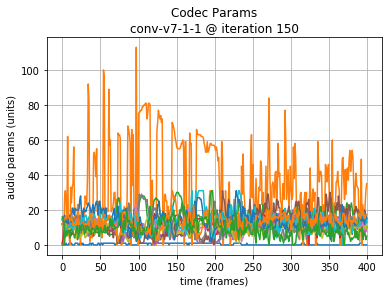

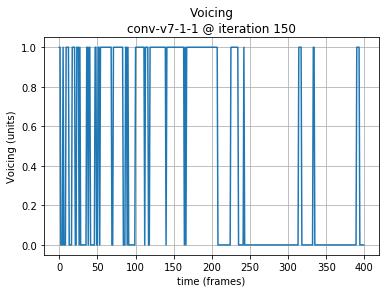

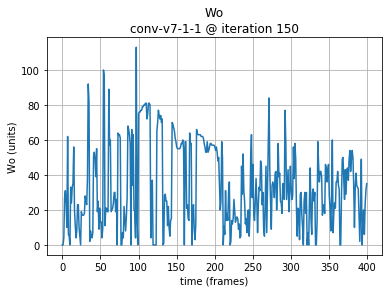

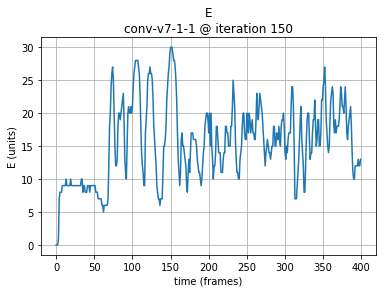

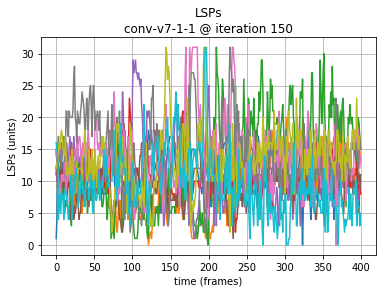

In [478]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

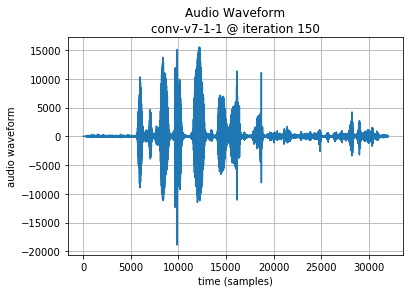

In [479]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [480]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [481]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/conv-v7-1-1/out-c2cb-300'

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))